# Question 1
Import the data located at [this link](https://github.com/alexanderquispe/Diplomado_PUCP/blob/main/_data/data_dengue_peru.csv). It has information on people infected with dengue at the district level for 2015 to 2021.


In [4]:
import pandas as pd

In [401]:
datos = pd.read_csv('../../_data/data_dengue_peru.csv', dtype={'Ubigeo': 'str'}, low_memory=False)
datos

Año  Semana Eventos o daños   Departamento       Distrito  \
0       2020      43          Dengue          CUSCO      MEGANTONI   
1       2021      41          Dengue       MOQUEGUA       MOQUEGUA   
2       2021      42          Dengue       MOQUEGUA       MOQUEGUA   
3       2020       1          Dengue          CUSCO      MEGANTONI   
4       2020      53          Dengue          CUSCO      MEGANTONI   
...      ...     ...             ...            ...            ...   
172139  2021      49          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172140  2021      49          Dengue  MADRE DE DIOS      TAHUAMANU   
172141  2021      50          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172142  2021      50          Dengue  MADRE DE DIOS      TAHUAMANU   
172143  2021      51          Dengue  MADRE DE DIOS      TAHUAMANU   

             Provincia  Ubigeo Casos  
0        LA CONVENCION  080914     2  
1       MARISCAL NIETO  180101   NaN  
2       MARISCAL NIETO  180101   NaN  
3        LA CONVENCION  080914     0  
4        LA CONVENCION  080914     2  
...                ...     ...   ...  
172139            MANU  170203   NaN  
172140       TAHUAMANU  170303   NaN  
172141            MANU  170203   NaN  
172142       TAHUAMANU  170303   NaN  
172143       TAHUAMANU  170303   NaN  

[172144 rows x 8 columns]

# Question 2

Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use [this code](https://stackoverflow.com/questions/35552874/get-first-letter-of-a-string-from-column).


In [403]:
# Generate UBIGEO for Departments (first two digits)
datos['ubigeo_department'] = datos['Ubigeo'].str[:2]

# Generate UBIGEO for Provinces (first four digits)
datos['ubigeo_province'] = datos['Ubigeo'].str[:4]

In [85]:
datos

Año  Semana Eventos o daños   Departamento       Distrito  \
0       2020      43          Dengue          CUSCO      MEGANTONI   
1       2021      41          Dengue       MOQUEGUA       MOQUEGUA   
2       2021      42          Dengue       MOQUEGUA       MOQUEGUA   
3       2020       1          Dengue          CUSCO      MEGANTONI   
4       2020      53          Dengue          CUSCO      MEGANTONI   
...      ...     ...             ...            ...            ...   
172139  2021      49          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172140  2021      49          Dengue  MADRE DE DIOS      TAHUAMANU   
172141  2021      50          Dengue  MADRE DE DIOS  MADRE DE DIOS   
172142  2021      50          Dengue  MADRE DE DIOS      TAHUAMANU   
172143  2021      51          Dengue  MADRE DE DIOS      TAHUAMANU   

             Provincia  Ubigeo Casos ubigeo_department ubigeo_province  
0        LA CONVENCION  080914     2                08            0809  
1       MARISCAL NIETO  180101   NaN                18            1801  
2       MARISCAL NIETO  180101   NaN                18            1801  
3        LA CONVENCION  080914     0                08            0809  
4        LA CONVENCION  080914     2                08            0809  
...                ...     ...   ...               ...             ...  
172139            MANU  170203   NaN                17            1702  
172140       TAHUAMANU  170303   NaN                17            1703  
172141            MANU  170203   NaN                17            1702  
172142       TAHUAMANU  170303   NaN                17            1703  
172143       TAHUAMANU  170303   NaN                17            1703  

[172144 rows x 10 columns]

# Question 3

In [ ]:
# pip install geopandas

In [34]:
import geopandas as gpd

In [142]:
datos_2021 = datos.loc[datos.Año==2021]
datos_2021.head()

Año  Semana Eventos o daños Departamento                 Distrito  \
1  2021      41          Dengue     MOQUEGUA                 MOQUEGUA   
2  2021      42          Dengue     MOQUEGUA                 MOQUEGUA   
6  2021      41          Dengue         LIMA            INDEPENDENCIA   
7  2021      41          Dengue         LIMA  VILLA MARIA DEL TRIUNFO   
8  2021      41          Dengue         LIMA                      ATE   

        Provincia  Ubigeo Casos ubigeo_department ubigeo_province  
1  MARISCAL NIETO  180101   NaN                18            1801  
2  MARISCAL NIETO  180101   NaN                18            1801  
6            LIMA  150112   NaN                15            1501  
7            LIMA  150143   NaN                15            1501  
8            LIMA  150103   NaN                15            1501

In [200]:
datos_2021.loc[datos_2021['Año'] == 2021, 'Casos'] = pd.to_numeric(datos_2021['Casos'], errors='coerce')

In [198]:
datos_2021['Casos'] = pd.to_numeric(datos_2021['Casos'], errors='coerce')

C:\Users\jesus\AppData\Local\Temp\ipykernel_22428\2428069302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_2021['Casos'] = pd.to_numeric(datos_2021['Casos'], errors='coerce')


In [202]:
datos_2021_anual = datos_2021.groupby('Ubigeo')['Casos'].sum().reset_index()
datos_2021_anual

Ubigeo  Casos
0    010101    0.0
1    010201  474.0
2    010202   25.0
3    010203   38.0
4    010204    8.0
..      ...    ...
464  250302   26.0
465  250303   32.0
466  250304   14.0
467  250305    2.0
468  250401    0.0

[469 rows x 2 columns]

In [204]:
#datos_2021_anual.to_excel('archivo.xlsx')

In [206]:
shpf1 = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp' )

In [208]:
shpf1 = shpf1[['UBIGEO', 'geometry']]
shpf1

UBIGEO                                           geometry
0     060504  POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...
1     061105  POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...
2     061109  POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...
3     061110  POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...
4     061203  POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...
...      ...                                                ...
1869  040404  POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...
1870  040405  POLYGON ((-72.3749 -15.2499, -72.37494 -15.250...
1871  040406  POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...
1872  040407  POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...
1873  120604  POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...

[1874 rows x 2 columns]

In [210]:
shpf1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [212]:
shpf1.head(3)

UBIGEO                                           geometry
0  060504  POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...
1  061105  POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...
2  061109  POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...

In [214]:
datos_2021_anual.head(3)

Ubigeo  Casos
0  010101    0.0
1  010201  474.0
2  010202   25.0

In [216]:
# Merge using inner way to drop missing values 

datos_map1 = pd.merge(shpf1, datos_2021_anual, how="left", left_on="UBIGEO", right_on="Ubigeo")
datos_map1

UBIGEO                                           geometry  Ubigeo  Casos
0     060504  POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...     NaN    NaN
1     061105  POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...     NaN    NaN
2     061109  POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...     NaN    NaN
3     061110  POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...     NaN    NaN
4     061203  POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...     NaN    NaN
...      ...                                                ...     ...    ...
1869  040404  POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...     NaN    NaN
1870  040405  POLYGON ((-72.3749 -15.2499, -72.37494 -15.250...     NaN    NaN
1871  040406  POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...     NaN    NaN
1872  040407  POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...     NaN    NaN
1873  120604  POLYGON ((-73.98589 -11.93382, -73.98628 -11.9...  120604  193.0

[1874 rows x 4 columns]

In [218]:
import matplotlib.pyplot as plt


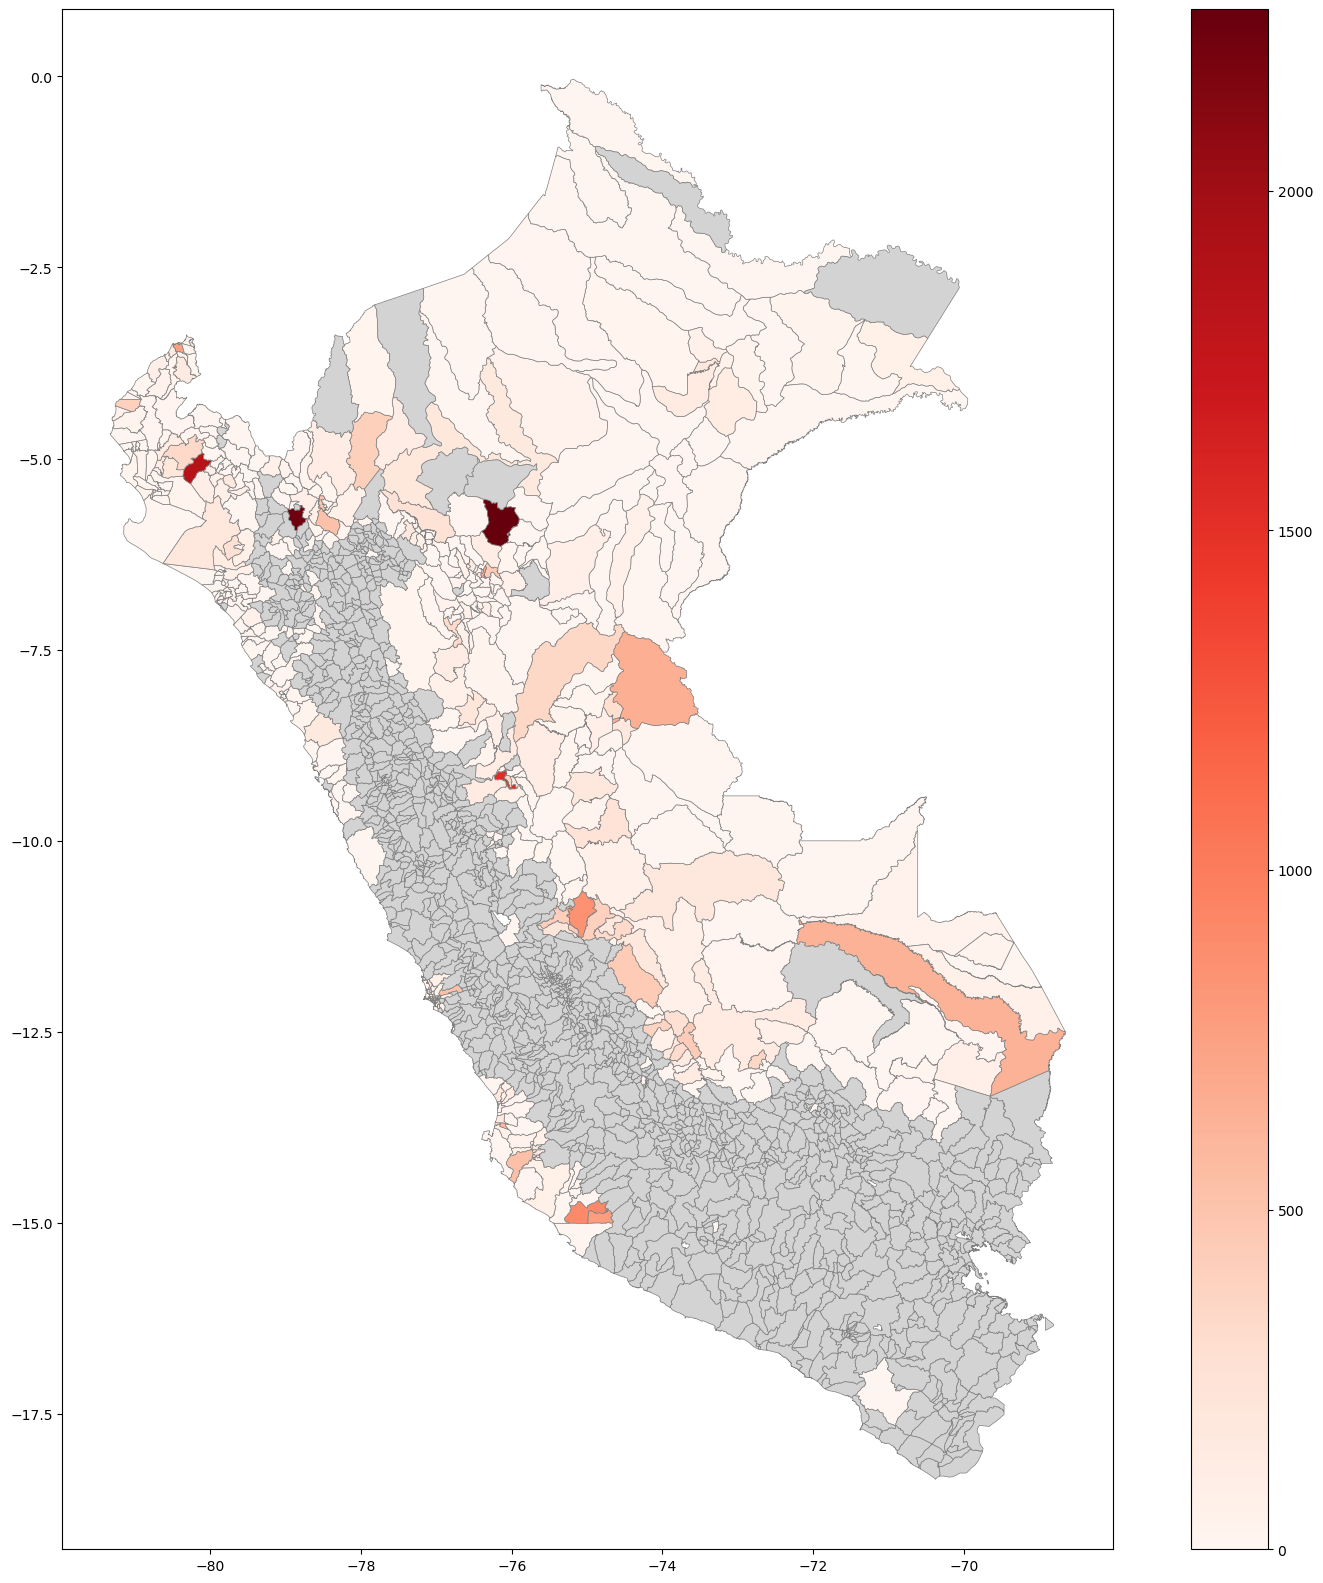

In [220]:
color_nan = 'lightgrey'

# Crear el gráfico
fig, ax = plt.subplots(figsize=(20, 20))

# Graficar con los colores deseados
datos_map1.plot(column='Casos', cmap='Reds', 
                edgecolor='gray', 
                linewidth=0.5,
                ax=ax,
                legend=True)

# Agregar el color para los NaN
nan_mask = datos_map1['Casos'].isna()
datos_map1[nan_mask].plot(ax=ax, color=color_nan, edgecolor='gray', linewidth=0.5, legend=False)

plt.show()

# Question 4

Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.


In [146]:
datos_2021

Año  Semana Eventos o daños   Departamento                 Distrito  \
1       2021      41          Dengue       MOQUEGUA                 MOQUEGUA   
2       2021      42          Dengue       MOQUEGUA                 MOQUEGUA   
6       2021      41          Dengue           LIMA            INDEPENDENCIA   
7       2021      41          Dengue           LIMA  VILLA MARIA DEL TRIUNFO   
8       2021      41          Dengue           LIMA                      ATE   
...      ...     ...             ...            ...                      ...   
172139  2021      49          Dengue  MADRE DE DIOS            MADRE DE DIOS   
172140  2021      49          Dengue  MADRE DE DIOS                TAHUAMANU   
172141  2021      50          Dengue  MADRE DE DIOS            MADRE DE DIOS   
172142  2021      50          Dengue  MADRE DE DIOS                TAHUAMANU   
172143  2021      51          Dengue  MADRE DE DIOS                TAHUAMANU   

             Provincia  Ubigeo  Casos ubigeo_department ubigeo_province  
1       MARISCAL NIETO  180101    NaN                18            1801  
2       MARISCAL NIETO  180101    NaN                18            1801  
6                 LIMA  150112    NaN                15            1501  
7                 LIMA  150143    NaN                15            1501  
8                 LIMA  150103    NaN                15            1501  
...                ...     ...    ...               ...             ...  
172139            MANU  170203    NaN                17            1702  
172140       TAHUAMANU  170303    NaN                17            1703  
172141            MANU  170203    NaN                17            1702  
172142       TAHUAMANU  170303    NaN                17            1703  
172143       TAHUAMANU  170303    NaN                17            1703  

[24857 rows x 10 columns]

In [148]:
datos_2021_provincial = datos_2021.groupby('ubigeo_province')['Casos'].sum().reset_index()
datos_2021_provincial

ubigeo_province   Casos
0             0101     0.0
1             0102   676.0
2             0103     0.0
3             0104   435.0
4             0107   719.0
..             ...     ...
87            2403    72.0
88            2501  1241.0
89            2502   179.0
90            2503   193.0
91            2504     0.0

[92 rows x 2 columns]

In [150]:
shpf1['UBIGEO_Prov'] = shpf1['UBIGEO'].str[:4]
shpf1_provincial = shpf1.dissolve(by='UBIGEO_Prov')

In [154]:
shpf1_provincial.head(3)

geometry  UBIGEO
UBIGEO_Prov                                                           
0101         POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...  010106
0102         POLYGON ((-78.3262 -5.56382, -78.32625 -5.5652...  010204
0103         POLYGON ((-77.9378 -6.03777, -77.93781 -6.0377...  010311

In [156]:
datos_2021_provincial.head(3)

ubigeo_province  Casos
0            0101    0.0
1            0102  676.0
2            0103    0.0

<Axes: >

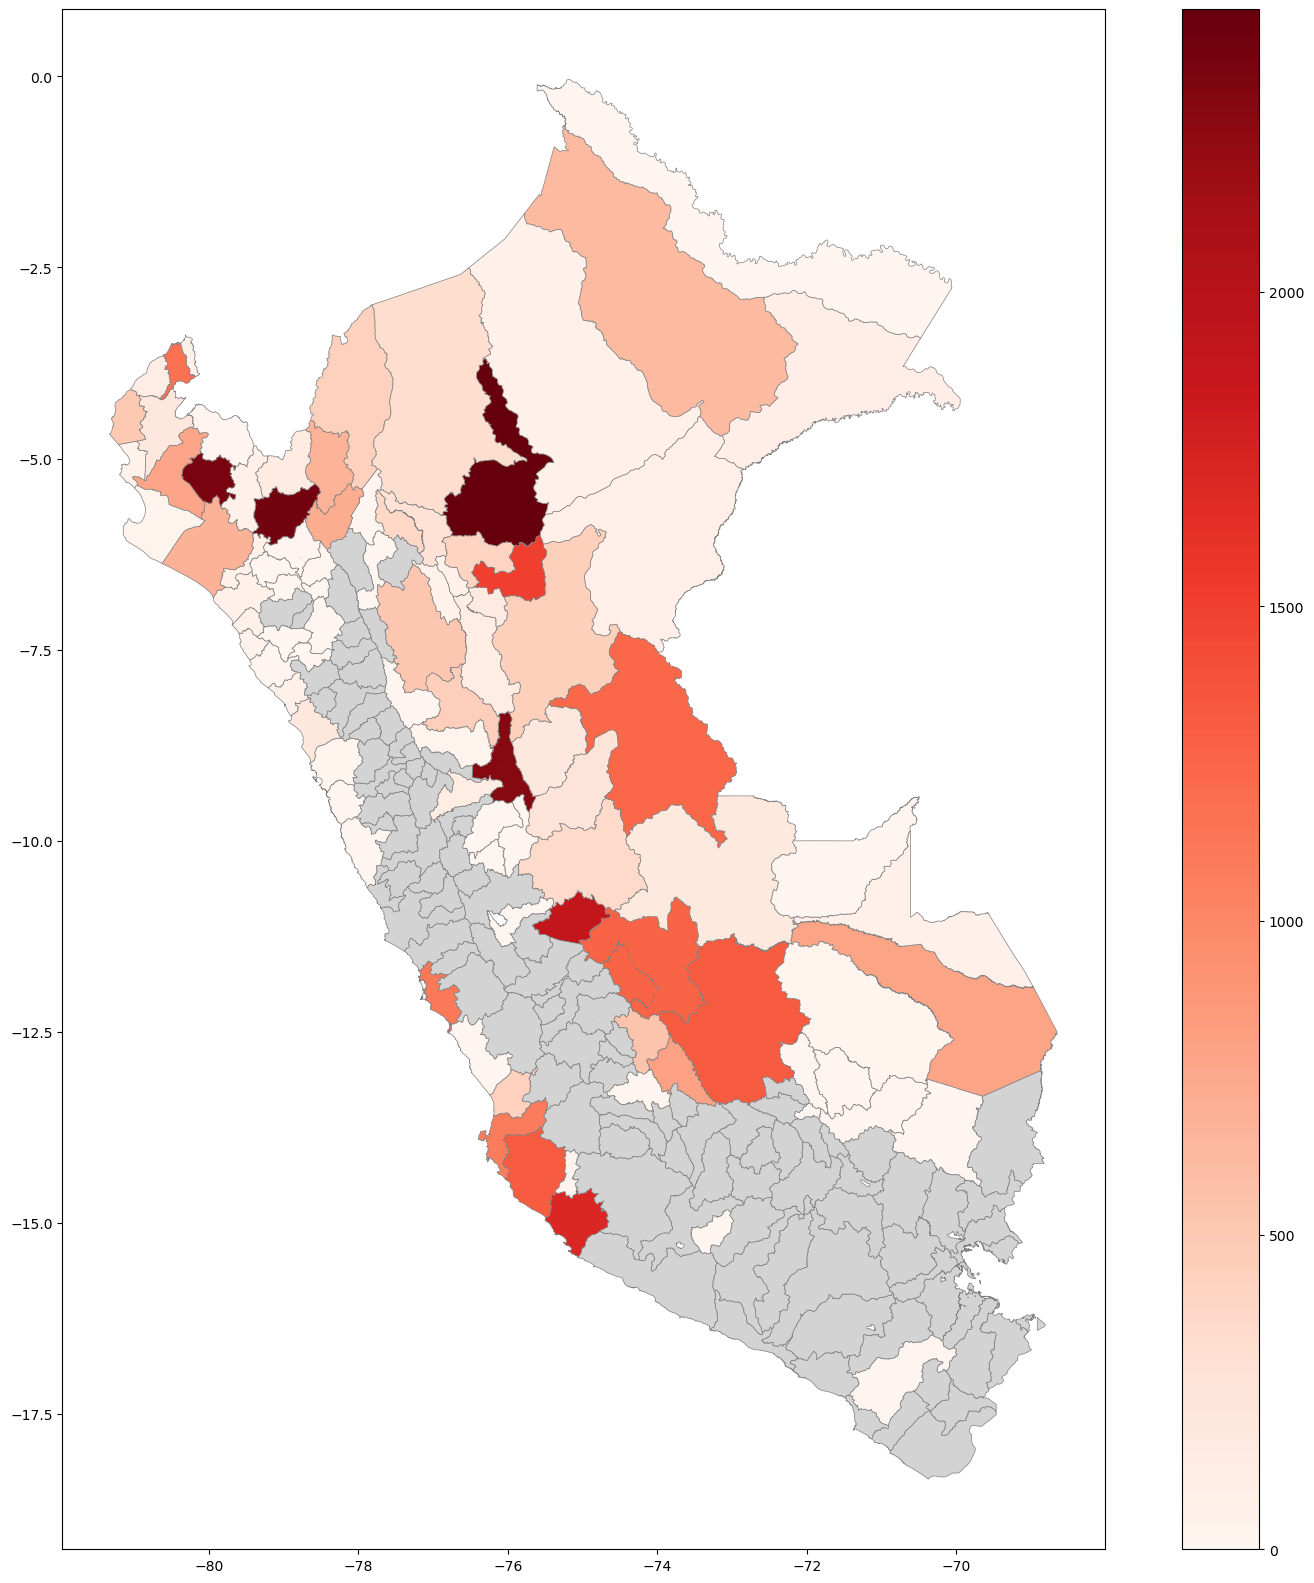

In [162]:
datos_map_prov = pd.merge(shpf1_provincial, datos_2021_provincial, how="left", left_on="UBIGEO_Prov", right_on="ubigeo_province")

# Define the color for NaN values
color_nan = 'lightgrey'

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot with the desired colormap
datos_map_prov.plot(column='Casos', cmap='Reds', 
                    edgecolor='gray', 
                    linewidth=0.5,
                    ax=ax,
                    legend=True)

# Plot the NaN values with the specified color
nan_mask = datos_map_prov['Casos'].isna()
datos_map_prov[nan_mask].plot(ax=ax, color=color_nan, edgecolor='gray', linewidth=0.5, legend=False)

# Question 5

Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.


In [481]:
datos_2021
datos.loc['Casos'] = pd.to_numeric(datos['Casos'], errors='coerce')

In [483]:
datos_2021_provincial = datos.groupby('ubigeo_department')['Casos'].sum().reset_index()
datos_2021_provincial

TypeError: can only concatenate str (not "float") to str

In [465]:
shpf1['UBIGEO_Dep'] = shpf1['UBIGEO'].str[:2]
shpf1_provincial = shpf1.dissolve(by='UBIGEO_Dep')

<Axes: >

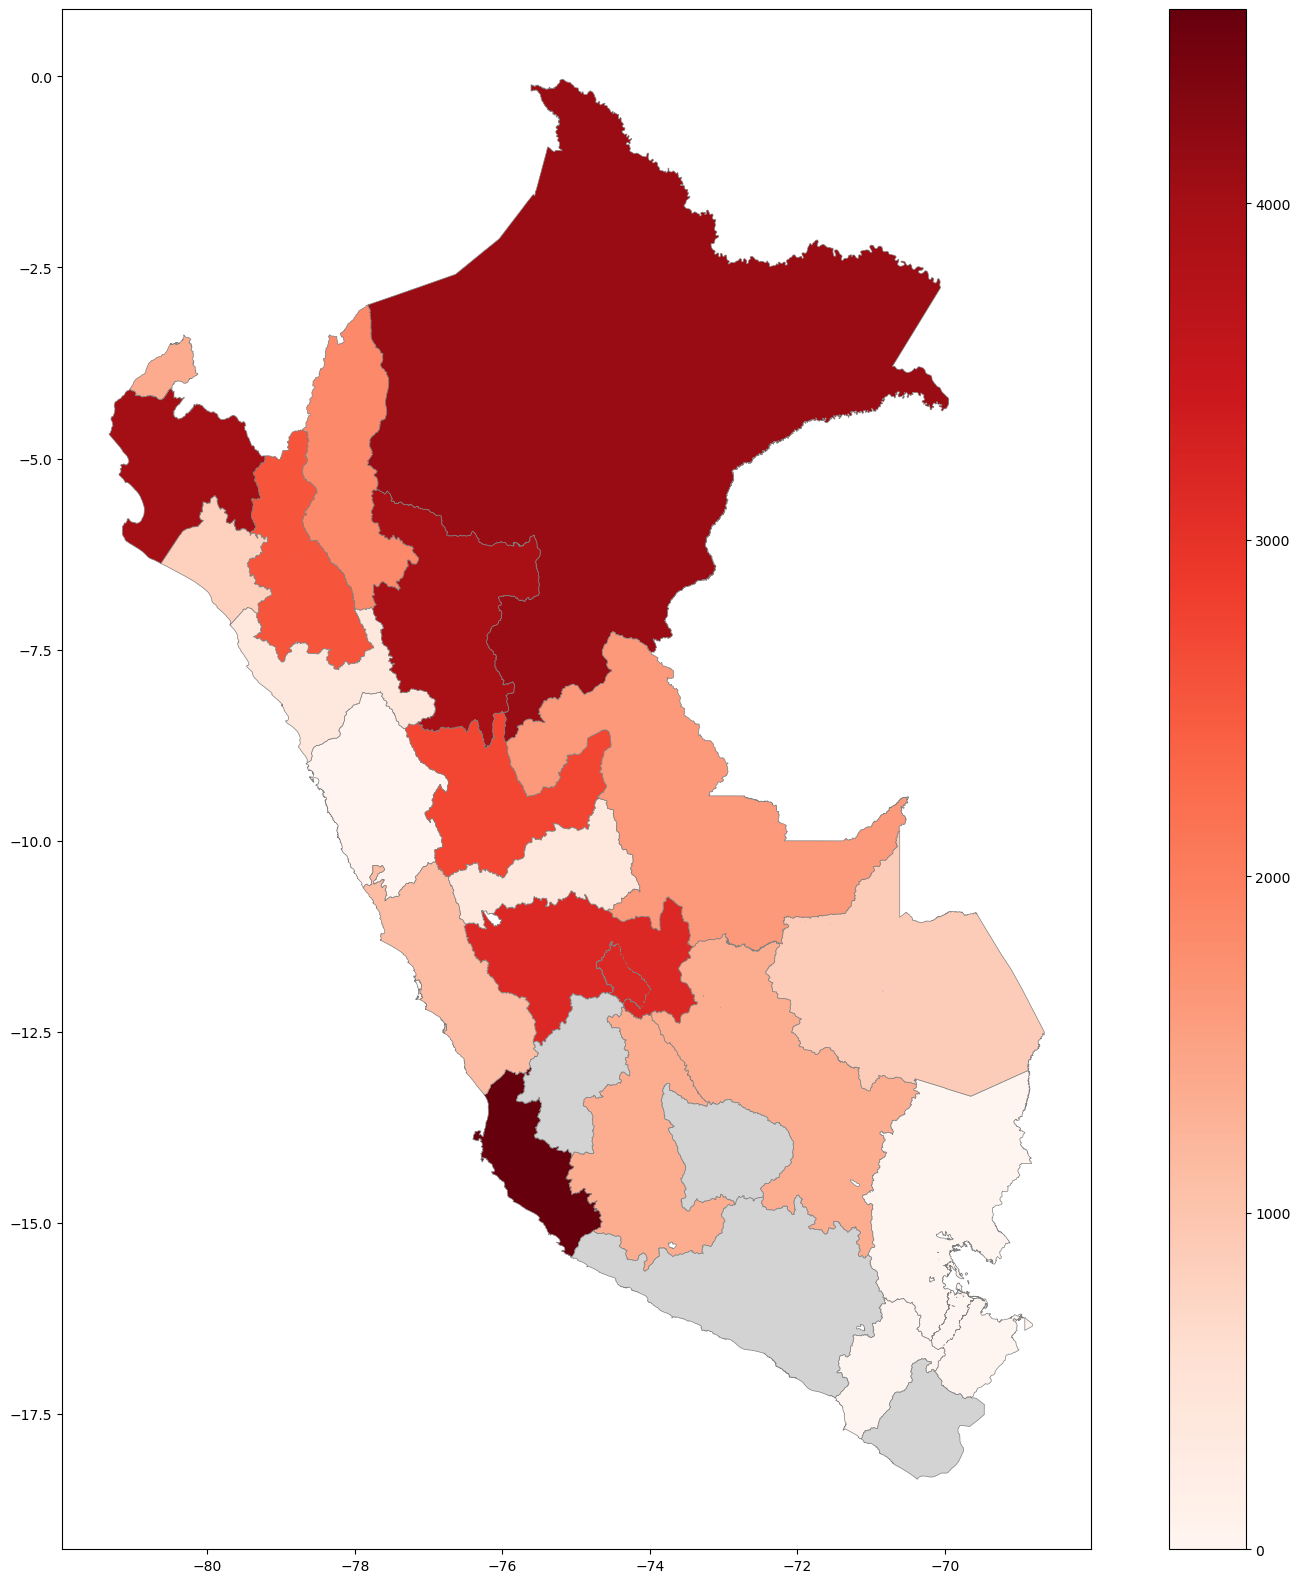

In [467]:
datos_map_prov = pd.merge(shpf1_provincial, datos_2021_provincial, how="left", left_on="UBIGEO_Dep", right_on="ubigeo_department")

# Define the color for NaN values
color_nan = 'lightgrey'

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot with the desired colormap
datos_map_prov.plot(column='Casos', cmap='Reds', 
                    edgecolor='gray', 
                    linewidth=0.5,
                    ax=ax,
                    legend=True)

# Plot the NaN values with the specified color
nan_mask = datos_map_prov['Casos'].isna()
datos_map_prov[nan_mask].plot(ax=ax, color=color_nan, edgecolor='gray', linewidth=0.5, legend=False)

In [297]:
datos['Casos'] = pd.to_numeric(datos['Casos'], errors='coerce')

In [299]:
datos['ubigeo_department'] = datos['Ubigeo'].str[:2]

In [301]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172145 entries, 0 to Casos
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Año                172144 non-null  float64
 1   Semana             172144 non-null  float64
 2   Eventos o daños    172144 non-null  object 
 3   Departamento       172144 non-null  object 
 4   Distrito           172144 non-null  object 
 5   Provincia          172144 non-null  object 
 6   Ubigeo             172144 non-null  object 
 7   Casos              166040 non-null  float64
 8   ubigeo_department  172144 non-null  object 
 9   ubigeo_province    172144 non-null  object 
dtypes: float64(3), object(7)
memory usage: 18.5+ MB


In [303]:
datos_depto = datos.groupby(['Año','ubigeo_department'])['Casos'].sum().reset_index()
datos_depto

Año ubigeo_department   Casos
0    2015.0                01    37.0
1    2015.0                02   118.0
2    2015.0                05   268.0
3    2015.0                06   218.0
4    2015.0                07     0.0
..      ...               ...     ...
142  2021.0                20  4010.0
143  2021.0                21     0.0
144  2021.0                22  3966.0
145  2021.0                24  1364.0
146  2021.0                25  1613.0

[147 rows x 3 columns]

In [307]:
shpf1['UBIGEO_Dep'] = shpf1['UBIGEO'].str[:2]
shpf1_departmental = shpf1.dissolve(by='UBIGEO_Dep')

In [387]:
shpf1_departmental

geometry  UBIGEO
UBIGEO_Dep                                                           
01          POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...  010106
02          POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...  020301
03          POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...  030108
04          POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...  040608
05          POLYGON ((-74.50188 -15.16058, -74.50191 -15.1...  050510
06          POLYGON ((-79.07326 -7.46865, -79.08528 -7.462...  060504
07          POLYGON ((-77.10456 -12.06373, -77.10449 -12.0...  070107
08          POLYGON ((-71.89418 -14.78954, -71.89579 -14.7...  080108
09          POLYGON ((-75.23983 -14.04591, -75.25853 -14.0...  090720
10          POLYGON ((-76.80833 -10.39296, -76.81024 -10.3...  100113
11          POLYGON ((-75.8558 -14.71546, -75.8554 -14.714...  110210
12          POLYGON ((-75.62838 -12.14038, -75.6284 -12.14...  120609
13          POLYGON ((-78.90292 -8.36708, -78.9033 -8.3663...  130102
14          POLYGON ((-79.82045 -6.98332, -79.82121 -6.982...  140103
15          MULTIPOLYGON (((-77.05715 -12.11098, -77.05741...  150201
16          POLYGON ((-74.50177 -7.26608, -74.50407 -7.268...  160601
17          POLYGON ((-70.40343 -13.11693, -70.40352 -13.1...  170301
18          POLYGON ((-70.90945 -17.65336, -70.90952 -17.6...  180101
19          POLYGON ((-76.1887 -10.95996, -76.18965 -10.95...  190104
20          POLYGON ((-80.88354 -5.54662, -80.88405 -5.545...  200301
21          MULTIPOLYGON (((-70.3346 -16.20157, -70.33827 ...  211105
22          POLYGON ((-76.73184 -8.51609, -76.73188 -8.516...  220703
23          POLYGON ((-70.33515 -18.31557, -70.3454 -18.32...  230111
24          POLYGON ((-80.39847 -3.98043, -80.3986 -3.9807...  240101
25          POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...  250202

In [427]:
print(shpf1.head())
print(shpf1_departmental.head())

   UBIGEO                                           geometry UBIGEO_Dep
0  060504  POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...         06
1  061105  POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...         06
2  061109  POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...         06
3  061110  POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...         06
4  061203  POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...         06
                                                     geometry  UBIGEO
UBIGEO_Dep                                                           
01          POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...  010106
02          POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...  020301
03          POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...  030108
04          POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...  040608
05          POLYGON ((-74.50188 -15.16058, -74.50191 -15.1...  050510


In [435]:
import geopandas as gpd

# Crear la columna UBIGEO_Dep
shpf1['UBIGEO_Dep'] = shpf1['UBIGEO'].str[:2]

# Disolver por UBIGEO_Dep
shpf1_departmental = shpf1.dissolve(by='UBIGEO_Dep')

# Verificar las columnas disponibles
print(shpf1_departmental.columns)

Index(['geometry', 'UBIGEO'], dtype='object')


In [461]:
datos_map_dep = shpf1_departmental.merge(datos_depto, how="left", left_on="UBIGEO_Dep", right_on="ubigeo_department")
datos_map_dep

geometry  UBIGEO     Año  \
0    POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...  010106  2015.0   
1    POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...  010106  2016.0   
2    POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...  010106  2017.0   
3    POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...  010106  2018.0   
4    POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...  010106  2019.0   
..                                                 ...     ...     ...   
146  POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...  250202  2017.0   
147  POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...  250202  2018.0   
148  POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...  250202  2019.0   
149  POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...  250202  2020.0   
150  POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...  250202  2021.0   

    ubigeo_department    Casos  
0                  01     37.0  
1                  01     90.0  
2                  01     93.0  
3                  01    109.0  
4                  01    164.0  
..                ...      ...  
146                25    779.0  
147                25    317.0  
148                25    214.0  
149                25  10934.0  
150                25   1613.0  

[151 rows x 5 columns]

In [451]:
datos_map_dep = datos_map_dep.dropna(subset=['Año'])

In [453]:
# Lista única de años
unique_years = datos_map_dep.Año.unique()
unique_years

array([2015., 2016., 2017., 2018., 2019., 2020., 2021.])

In [455]:
datos_map_dep.Año.unique()

array([2015., 2016., 2017., 2018., 2019., 2020., 2021.])

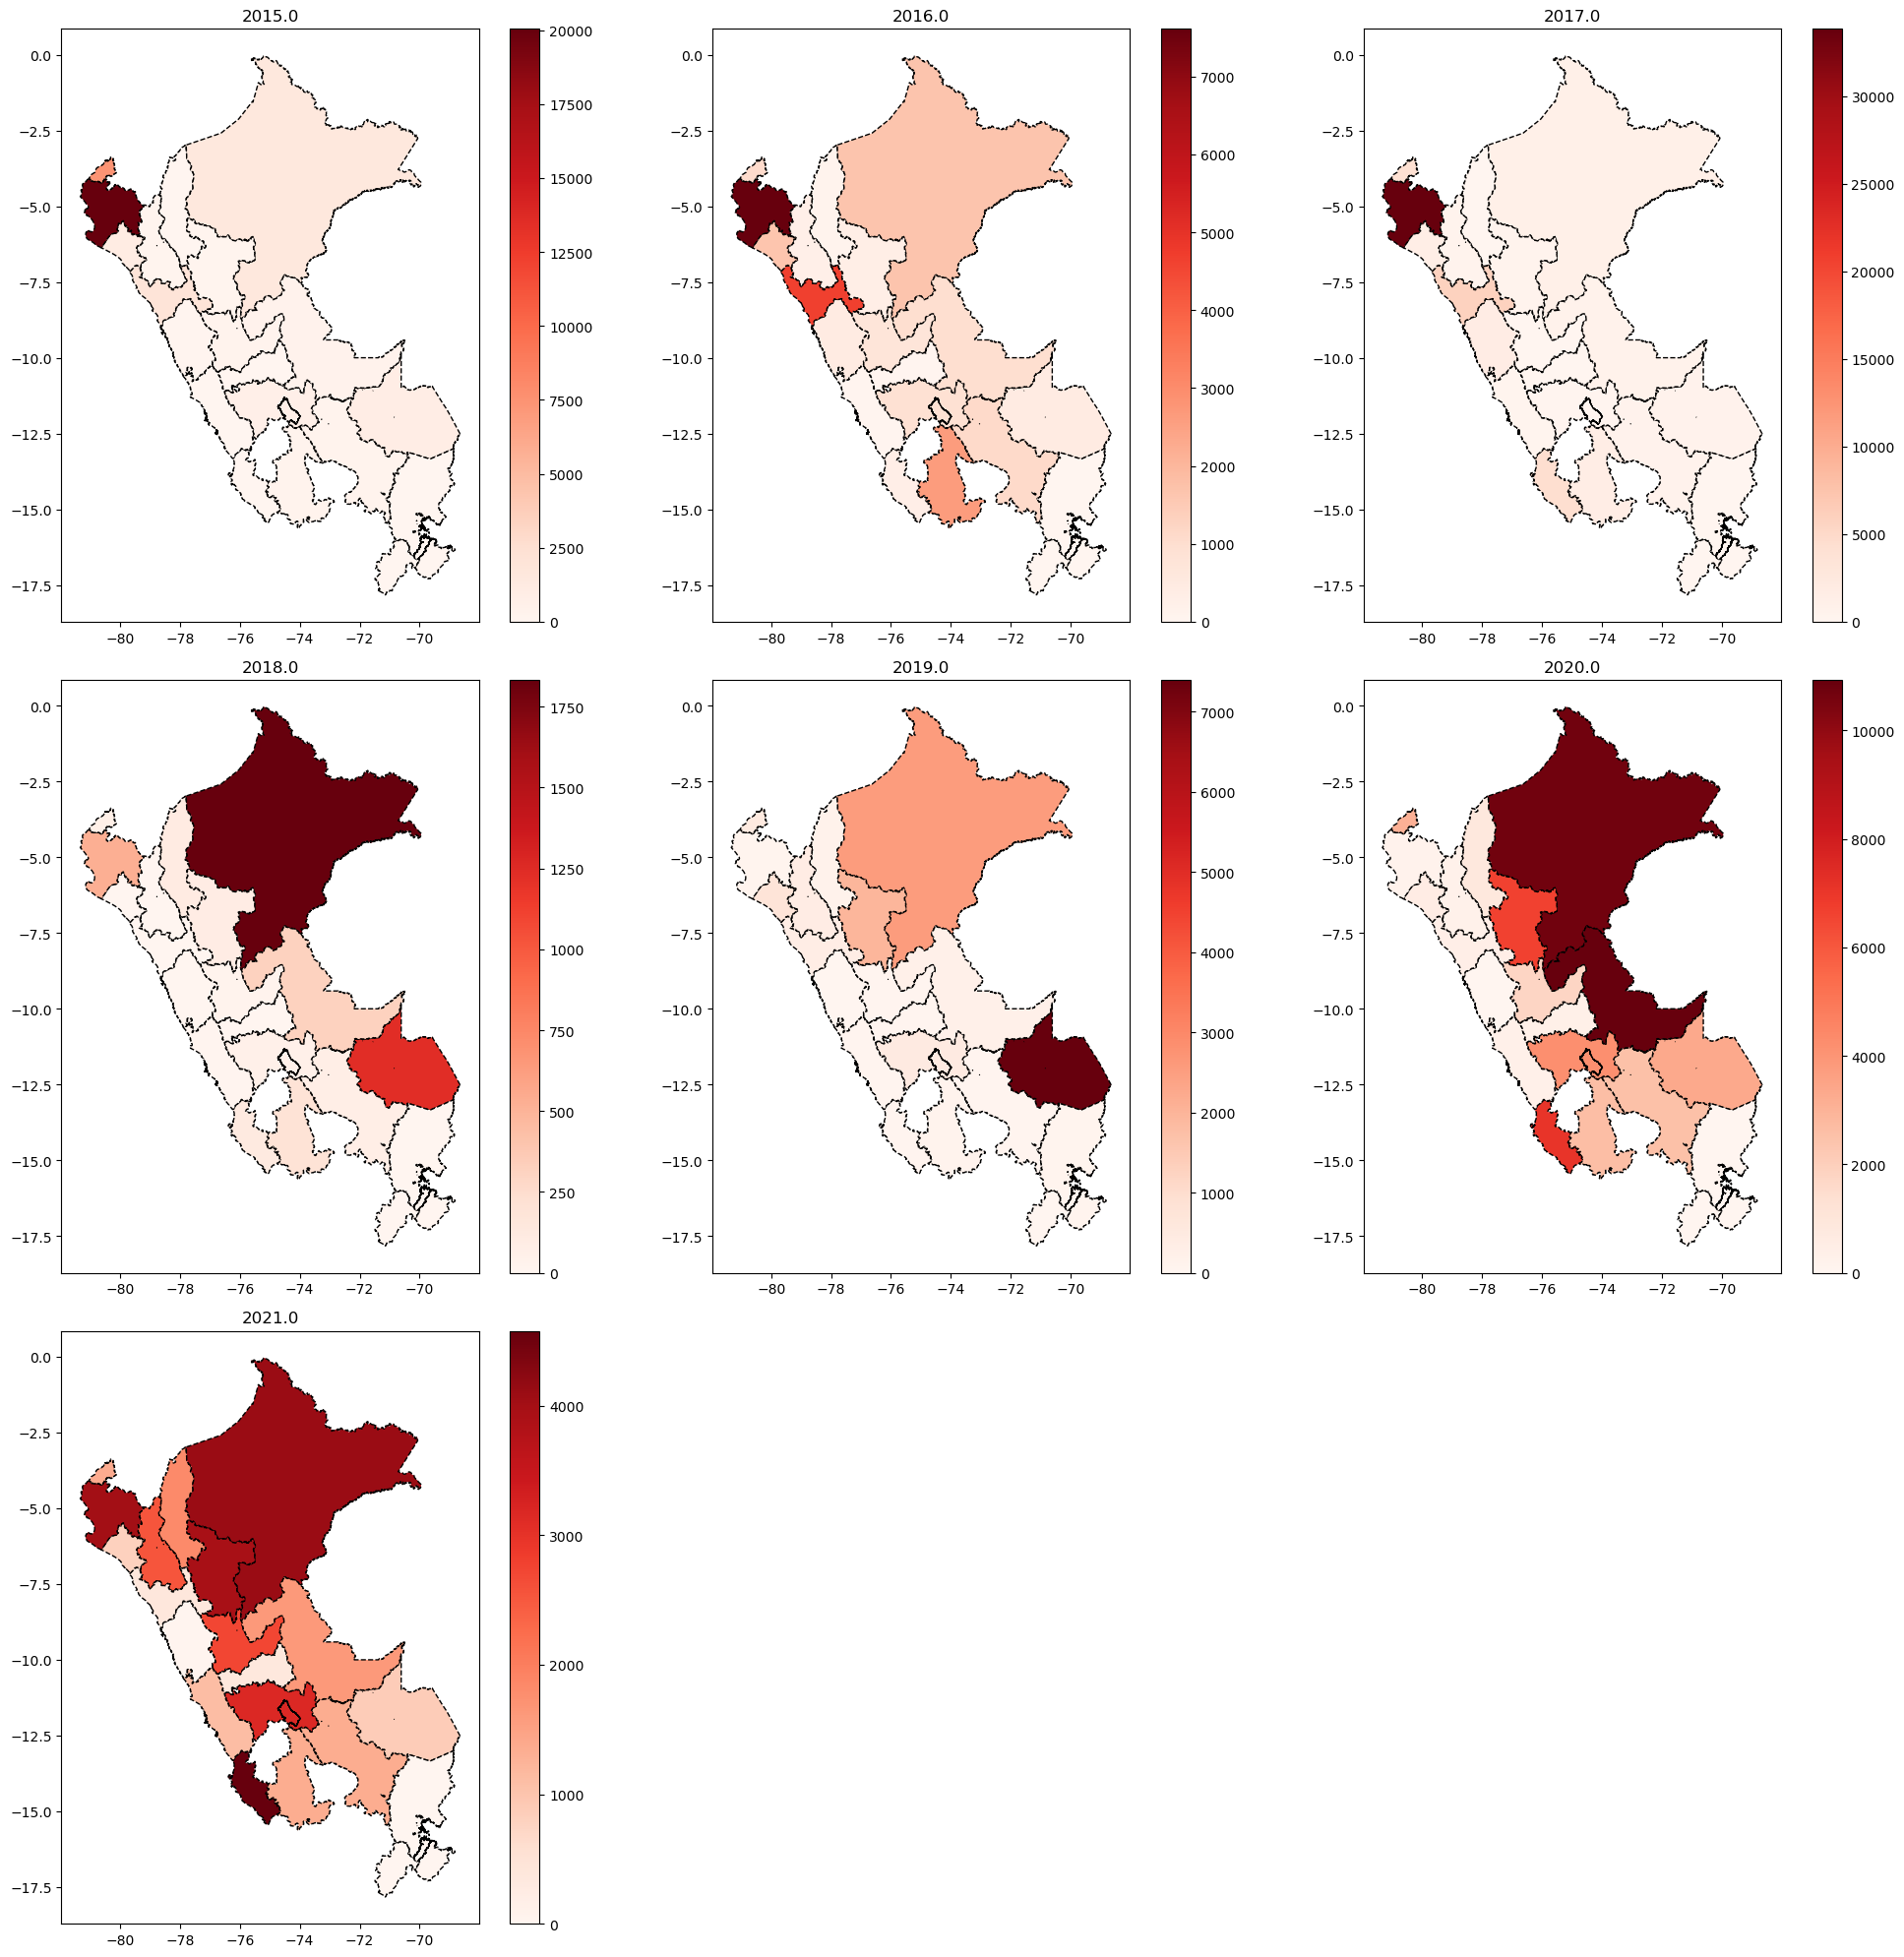

In [457]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, axis = plt.subplots( nrows = 3, ncols= 3, figsize = ( 20, 20 ) )
axes = axis.flatten()

# Define the color for NaN values
color_nan = 'lightgrey'

years = datos_map_dep.Año.unique()

for idx, year in enumerate(years):
    ax = axes[idx]
    datos_map_depa = datos_map_dep[datos_map_dep.Año == year]
    datos_map_depa.plot(column='Casos', cmap='Reds', linestyle='--', edgecolor='black', legend=True, 
                        missing_kwds={"color": color_nan, "edgecolor": "gray"}, ax=ax)
    ax.set_title(year)



# Eliminar ejes vacíos si hay más subplots que años
for ax in axes[len(years):]:
    ax.remove()

plt.tight_layout()
plt.show()



<Axes: >

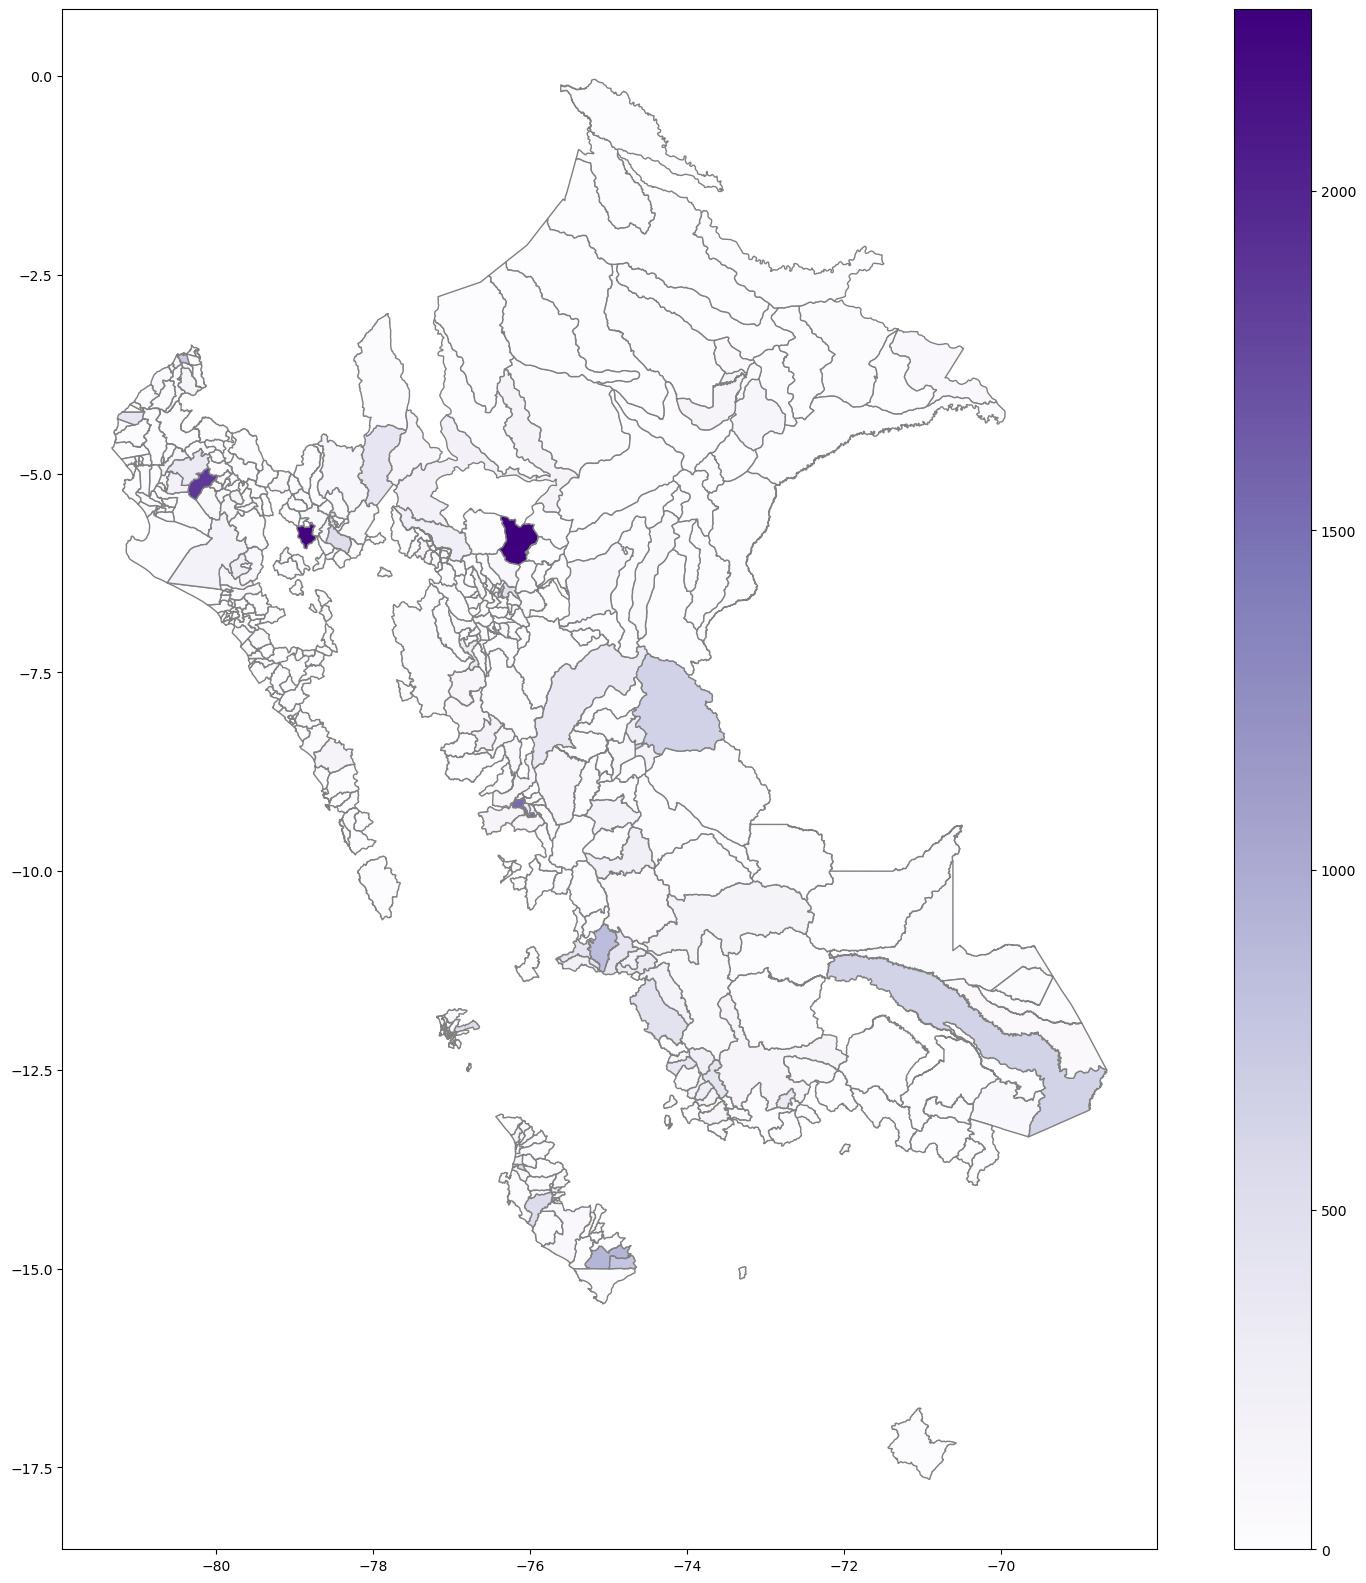

In [123]:
# Plot covid infection at disctrict level 

datos_map1.plot( column='Casos', cmap='Purples',   # 'Blues', 'Greens', 'Oranges', 'Purples', 'Greys', 'viridis', 'plasma', 'magma', 'inferno'
          figsize=(20, 20),
          linestyle='-',
          edgecolor='gray',
          legend = True )

In [1]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))


In [2]:
import matplotlib.pyplot as plt 

import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
# Get data of labor
sex_work = pd.read_stata( r'../_data/8_trab_sex_20.dta' )
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy()
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy()

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )

In [4]:
# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )

In [5]:
# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

In [6]:
df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()

## Shapefile

In [8]:
dpt_shp = gpd.read_file( r'../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp' )

In [9]:
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )

<Axes: >

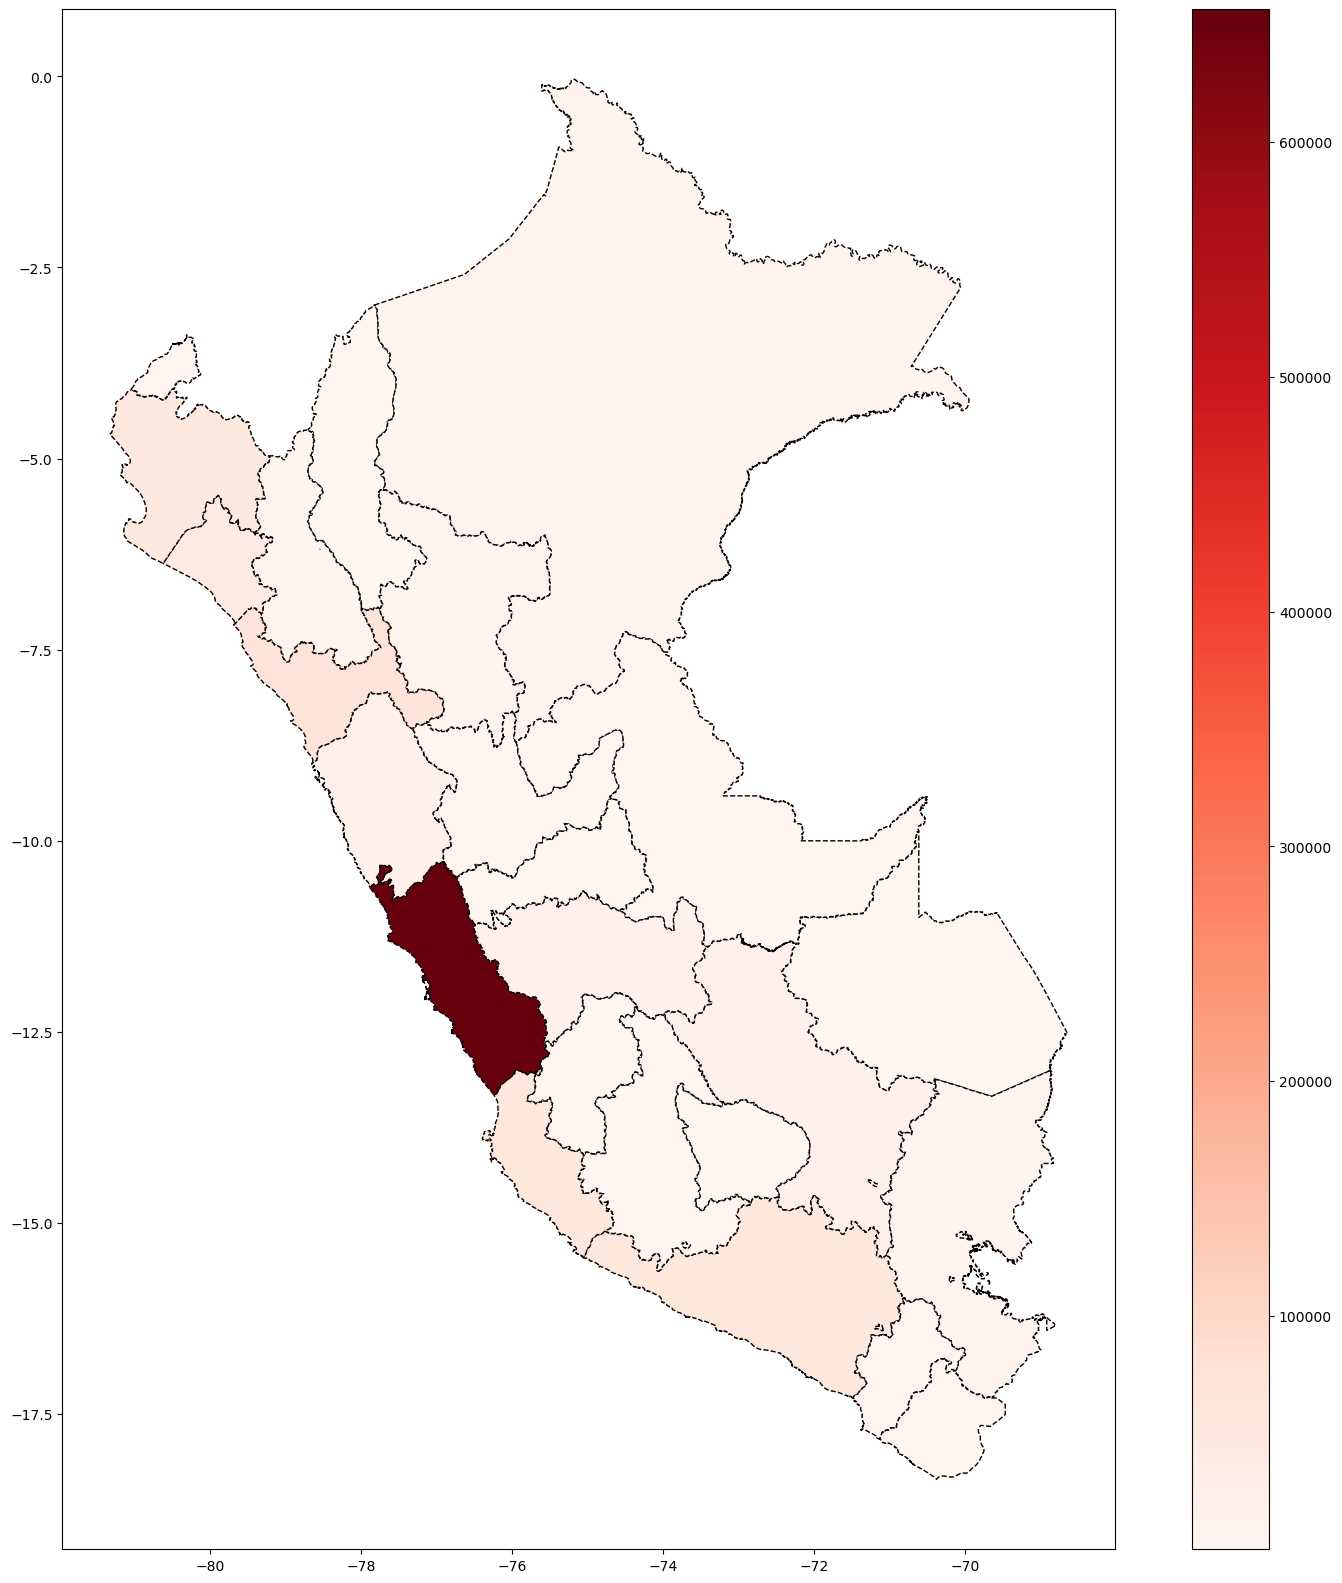

In [10]:
df3.plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

<Axes: >

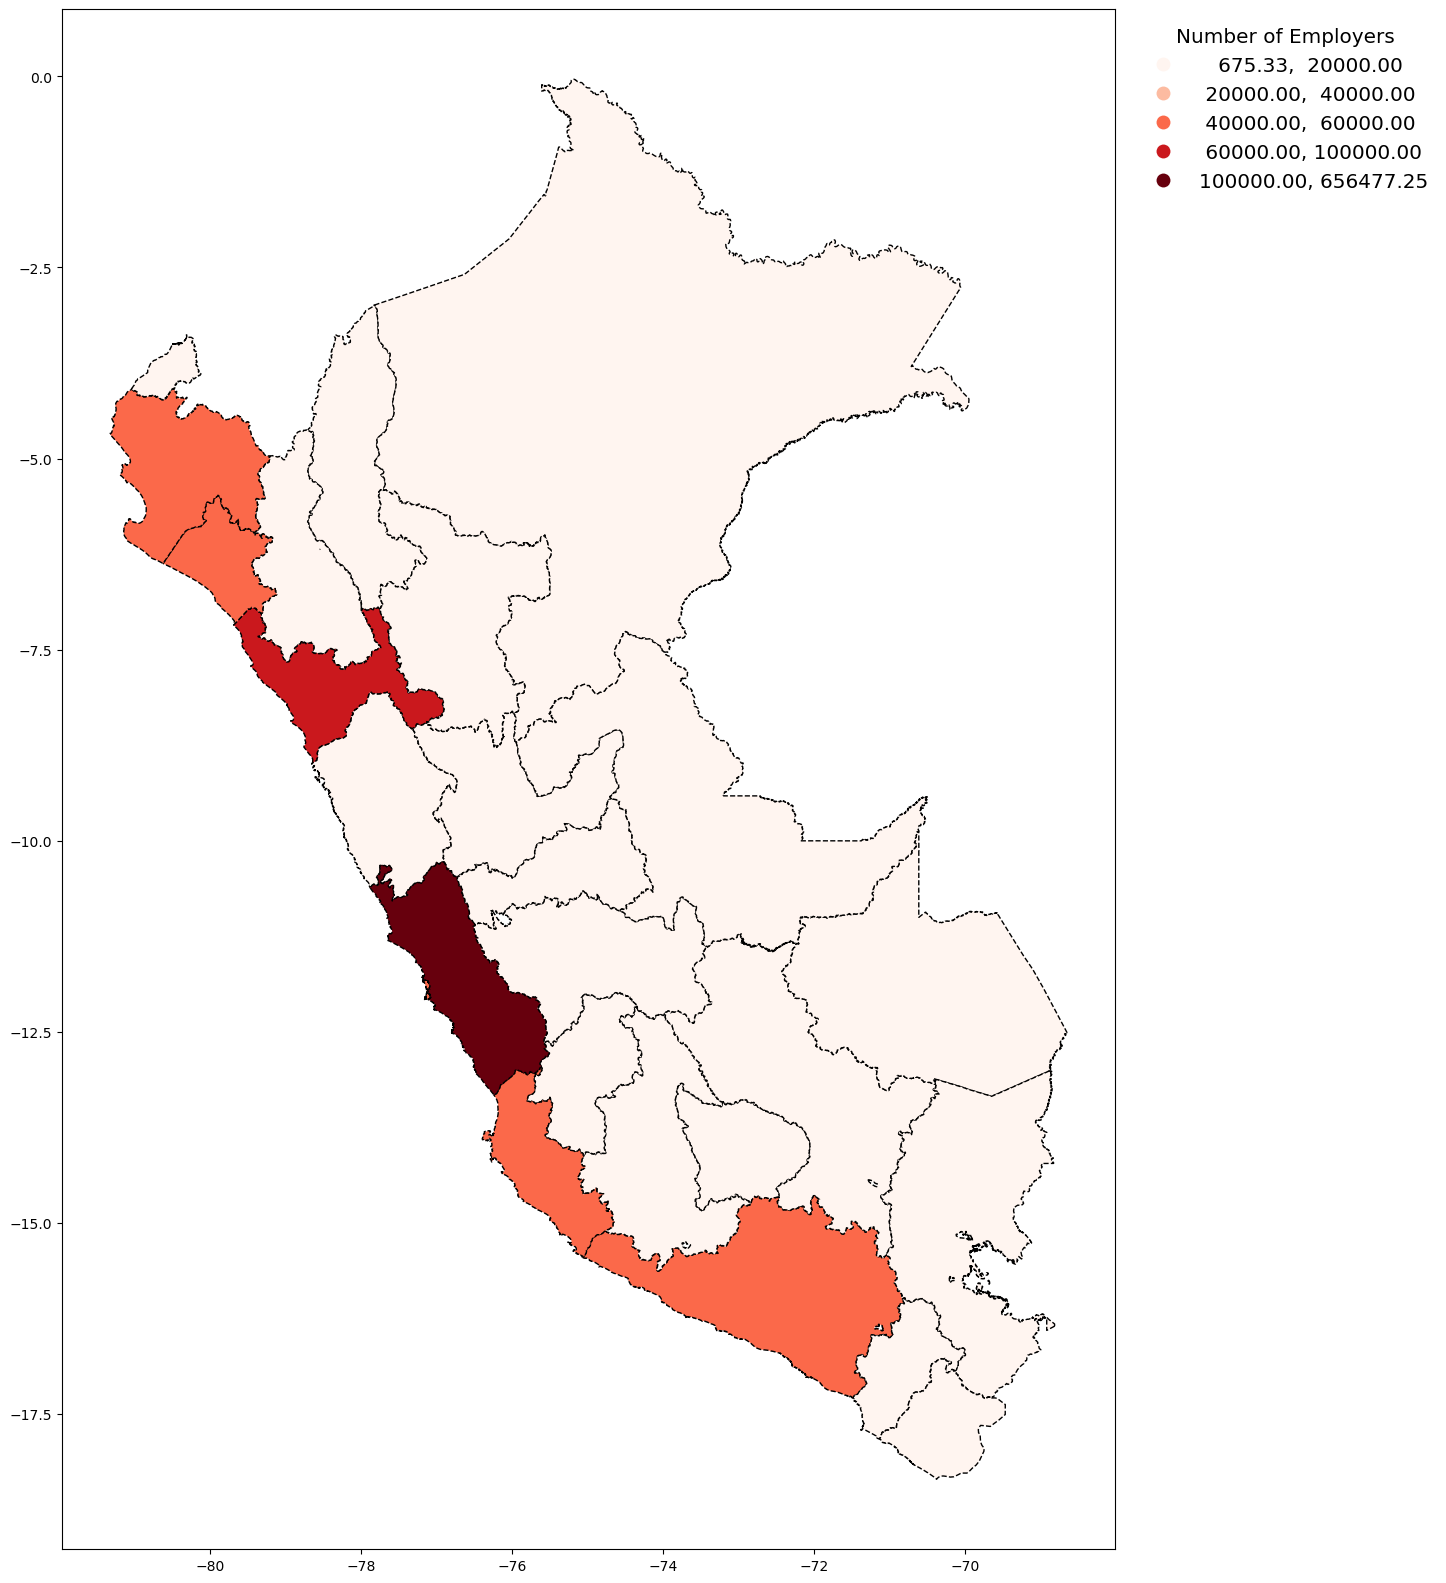

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
df3.plot( ax = ax, 
        column='women_empl', 
         cmap= 'Reds', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20000, 40000, 60000, 100000  ] ), 
         legend_kwds = dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Employers", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )


<Axes: >

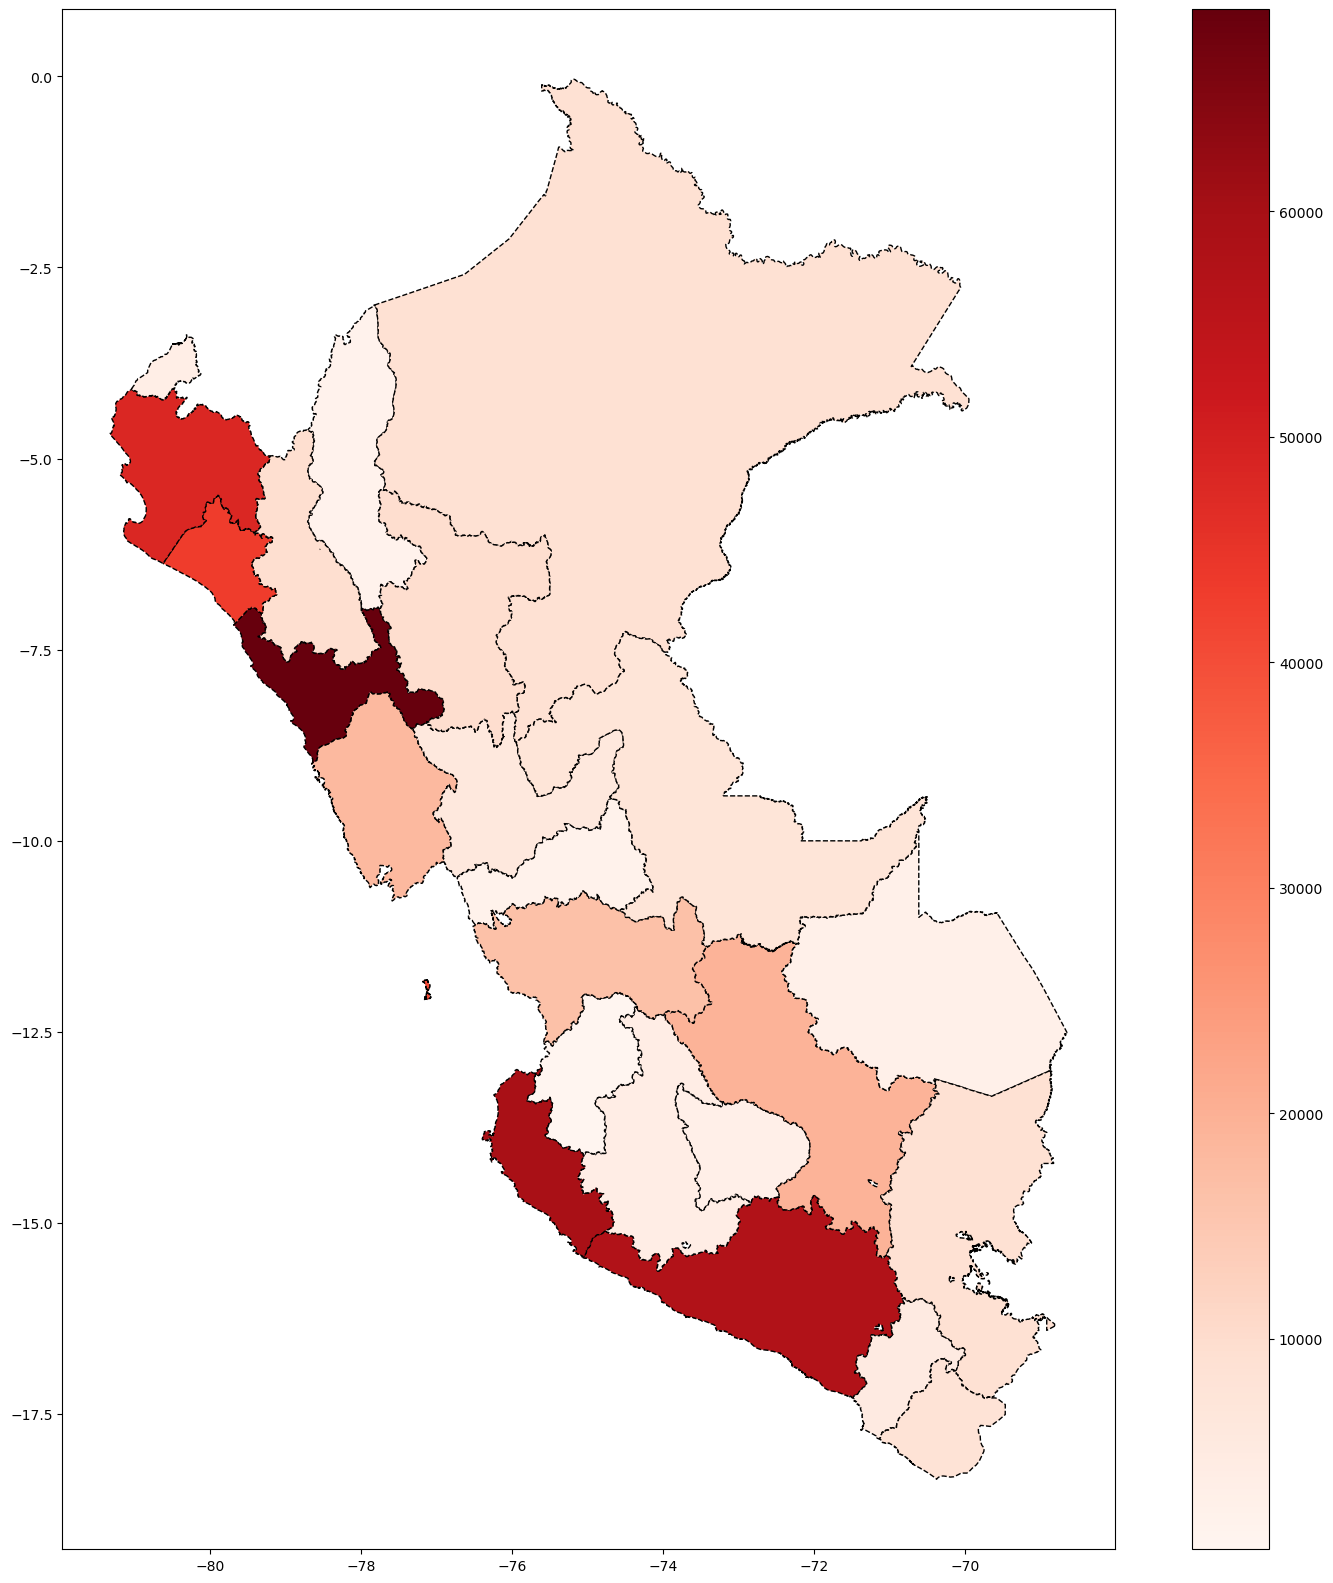

In [12]:
df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

In [13]:
df4 = sex_work.groupby( ['dpt_code', 'month', 'sex'], as_index = False )[['empl']].sum() \
        .pivot( index = [ 'dpt_code', 'month' ] , columns = 'sex',values='empl') \
        .reset_index()

In [14]:
df4

sex dpt_code      month  S.I.  Hombre  Mujer
0         01    January   472    5108   2043
1         01   February   441    4951   2059
2         01      March   423    4459   2056
3         01      April   314    3211   1811
4         01        May   297    3049   1642
..       ...        ...   ...     ...    ...
295       25     August  1654   16885   7425
296       25  September  1689   17886   7549
297       25    October  1812   19223   7751
298       25   November  1882   19758   7933
299       25   December  1848   19304   8087

[300 rows x 5 columns]

In [15]:
df4[ 'prop_wom' ] = ( df4.Mujer * 100 / df4.Hombre )

In [16]:
df5 = dpt_shp.merge( df4, left_on = 'CCDD', right_on = 'dpt_code'  )

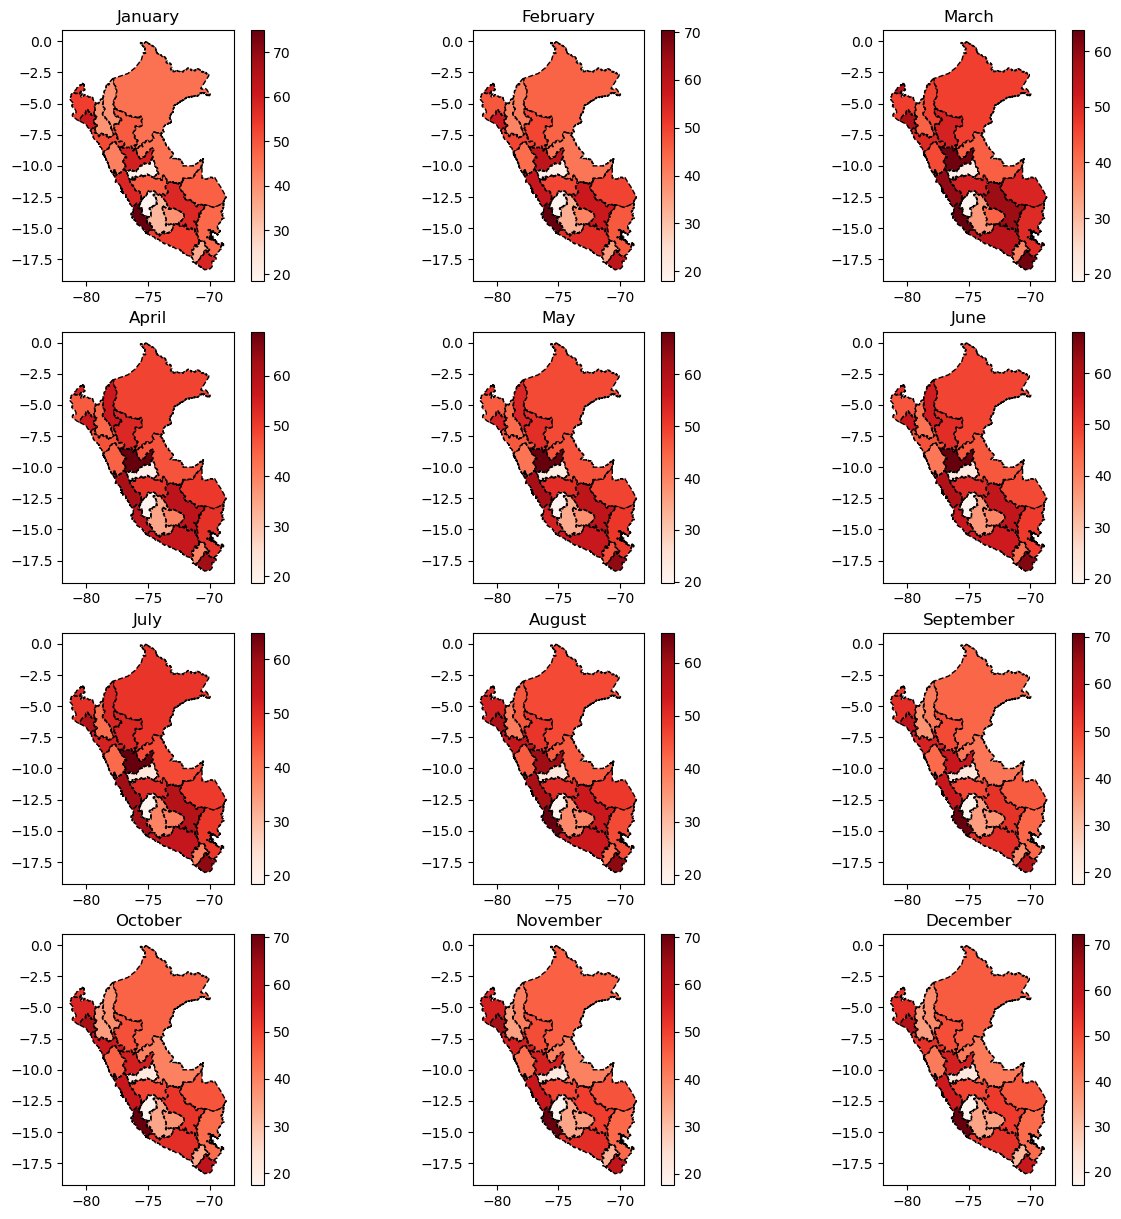

In [17]:
fig, axis = plt.subplots( nrows = 4, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 4 ):
    for j in range ( 3 ):
        
        
        ax = axis[ i ][ j ]
        
        month = df5.month.unique()[ idx ]
        
        df6 = df5[ df5.month == month ]
        
        df6.plot( column='prop_wom', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( month )
        
        idx = idx + 1

In [18]:
from textwrap import wrap

In [19]:
# Inverting colour map
cmap = plt.cm.OrRd

<Axes: >

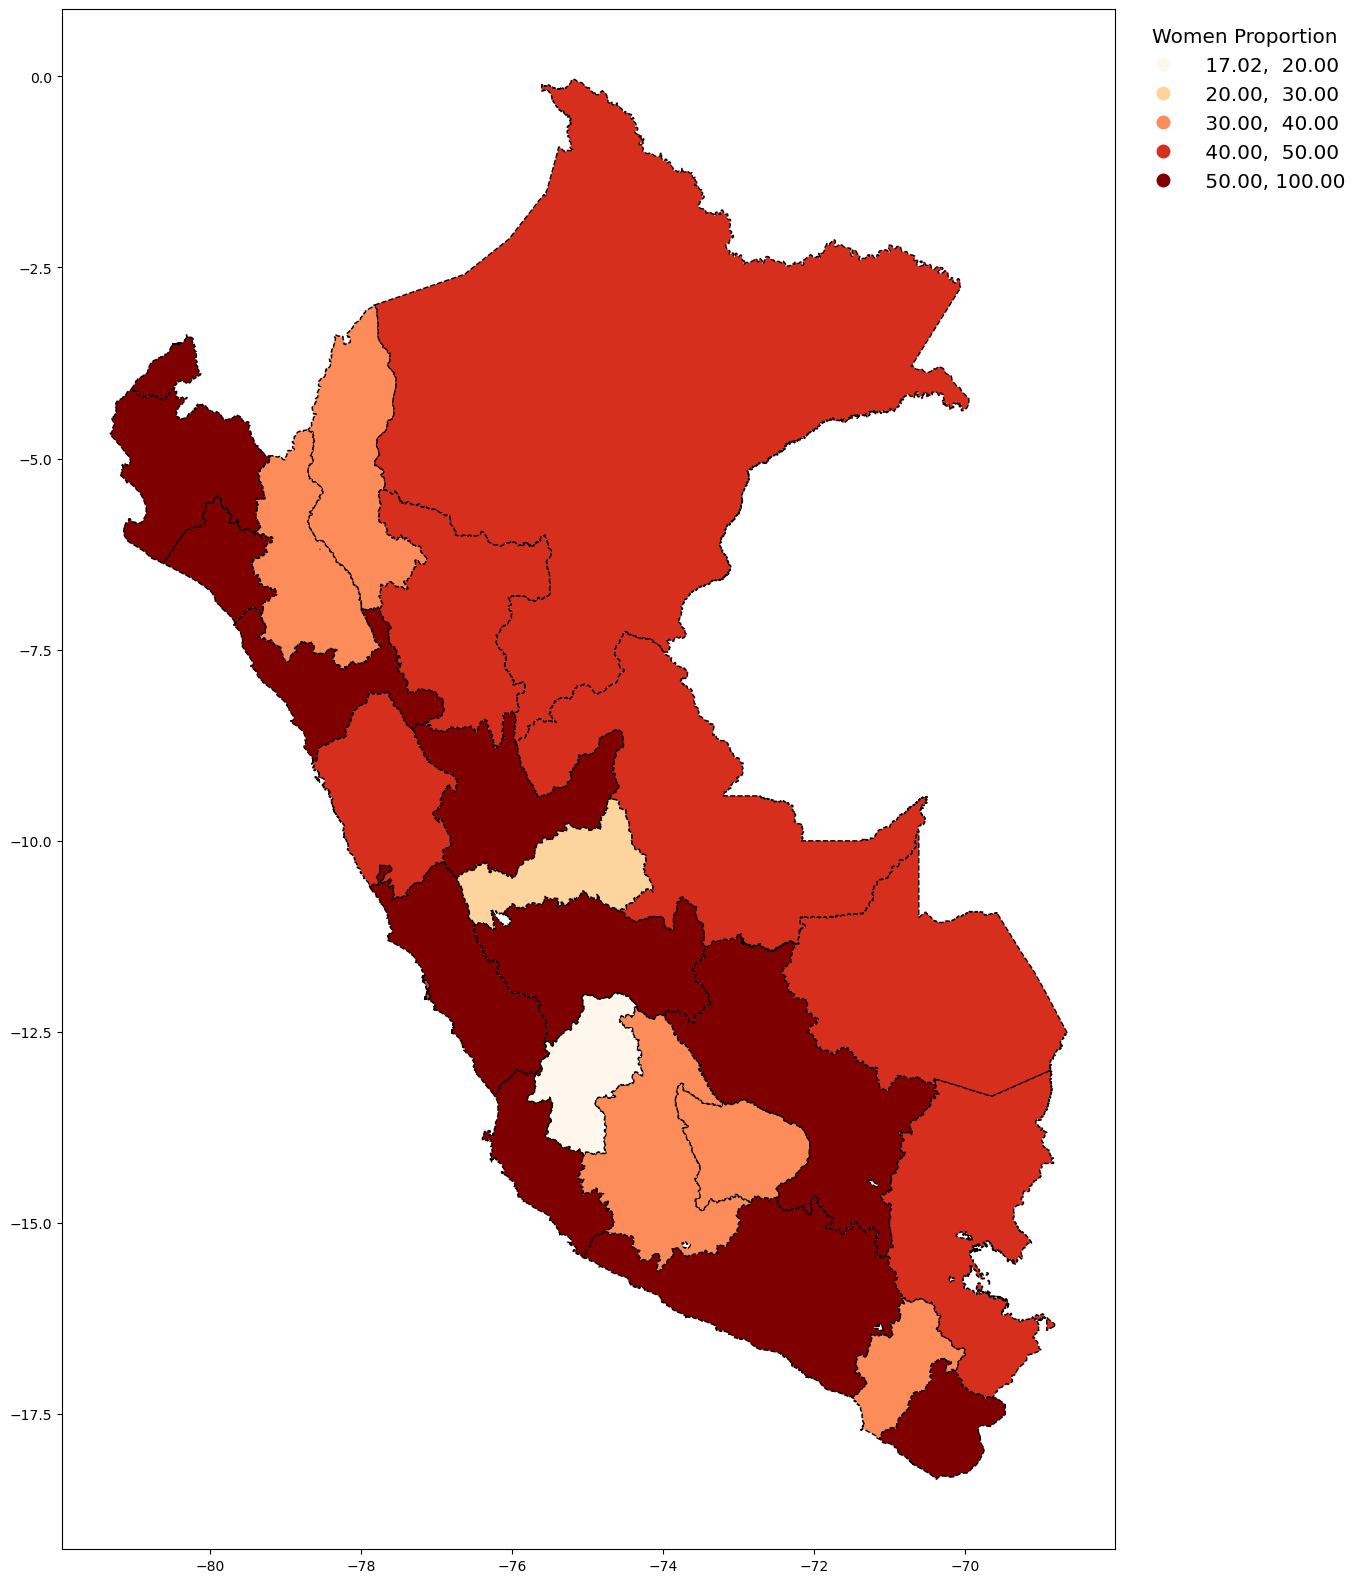

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )


In [21]:
df6.loc[ (df6.NOMBDEP == 'LIMA'), 'prop_wom' ] = np.nan

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         missing_kwds= dict(color = "#DADADB",), 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

<Axes: >

<Axes: >

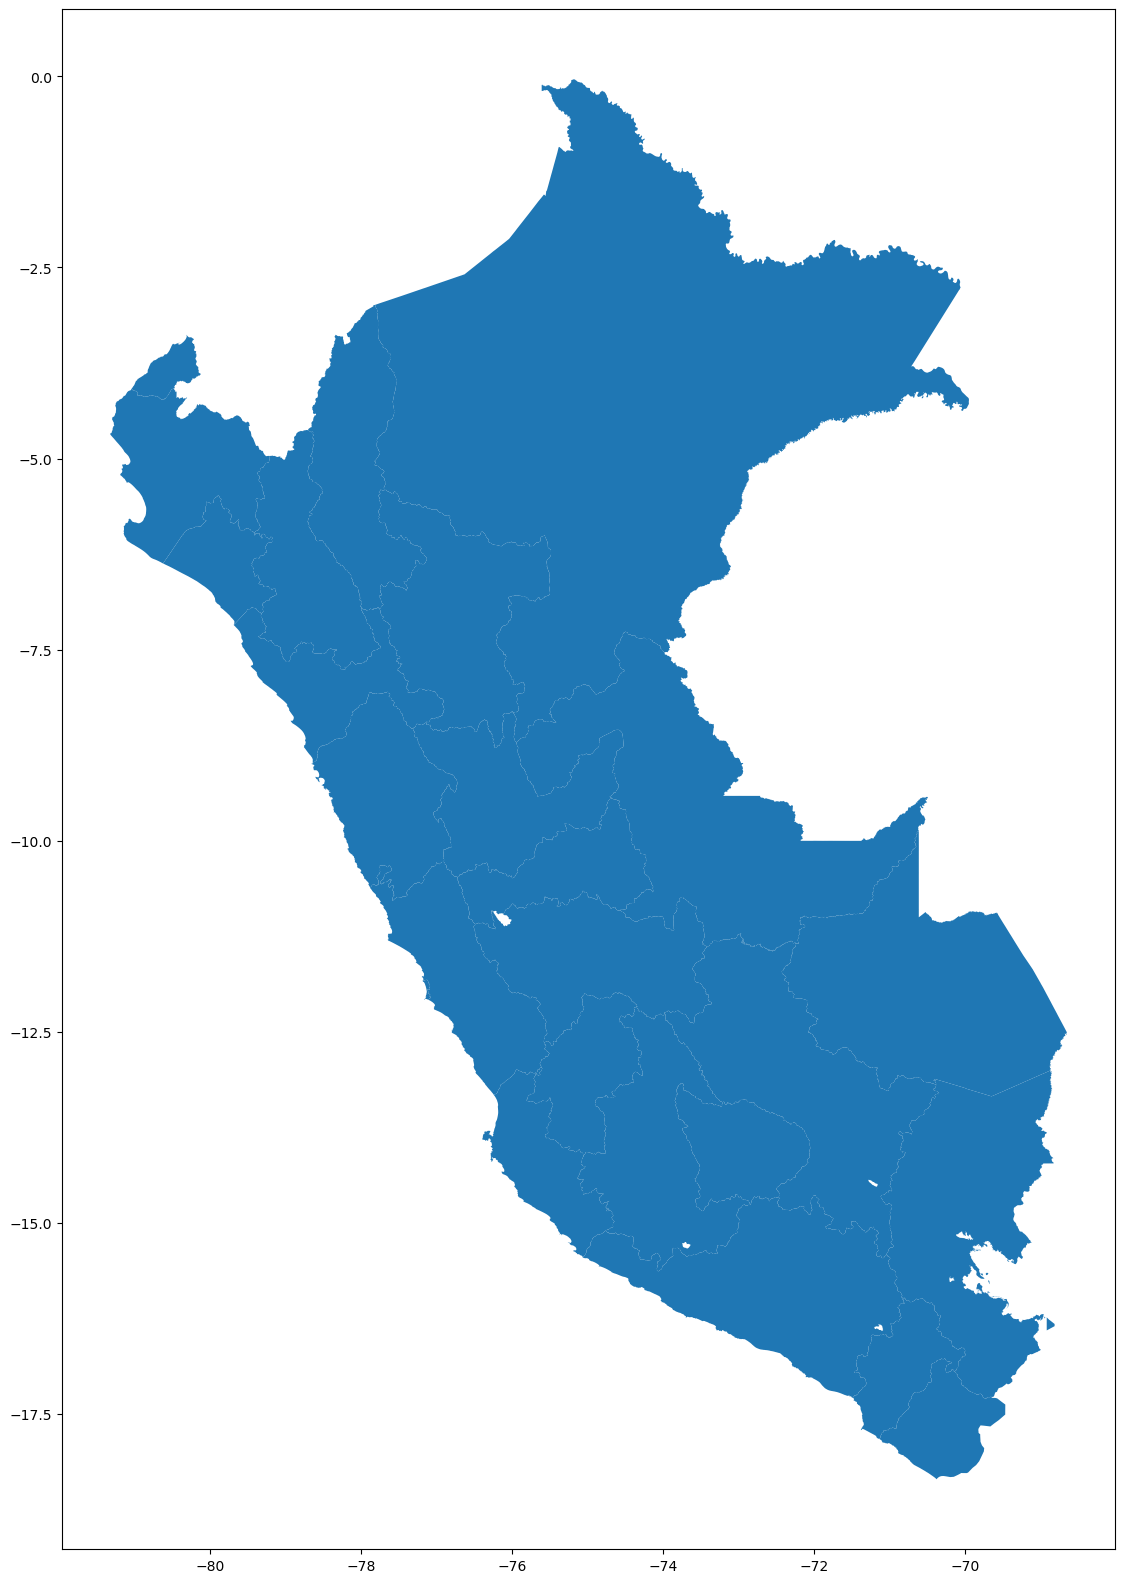

In [23]:
fig, ax = plt.subplots(figsize=(20, 20))
dpt_shp.plot( ax = ax )

In [24]:
dpt_shp['country'] = 'PERU'

In [25]:
ctr_shp = dpt_shp.dissolve( by = 'country')

<Axes: >

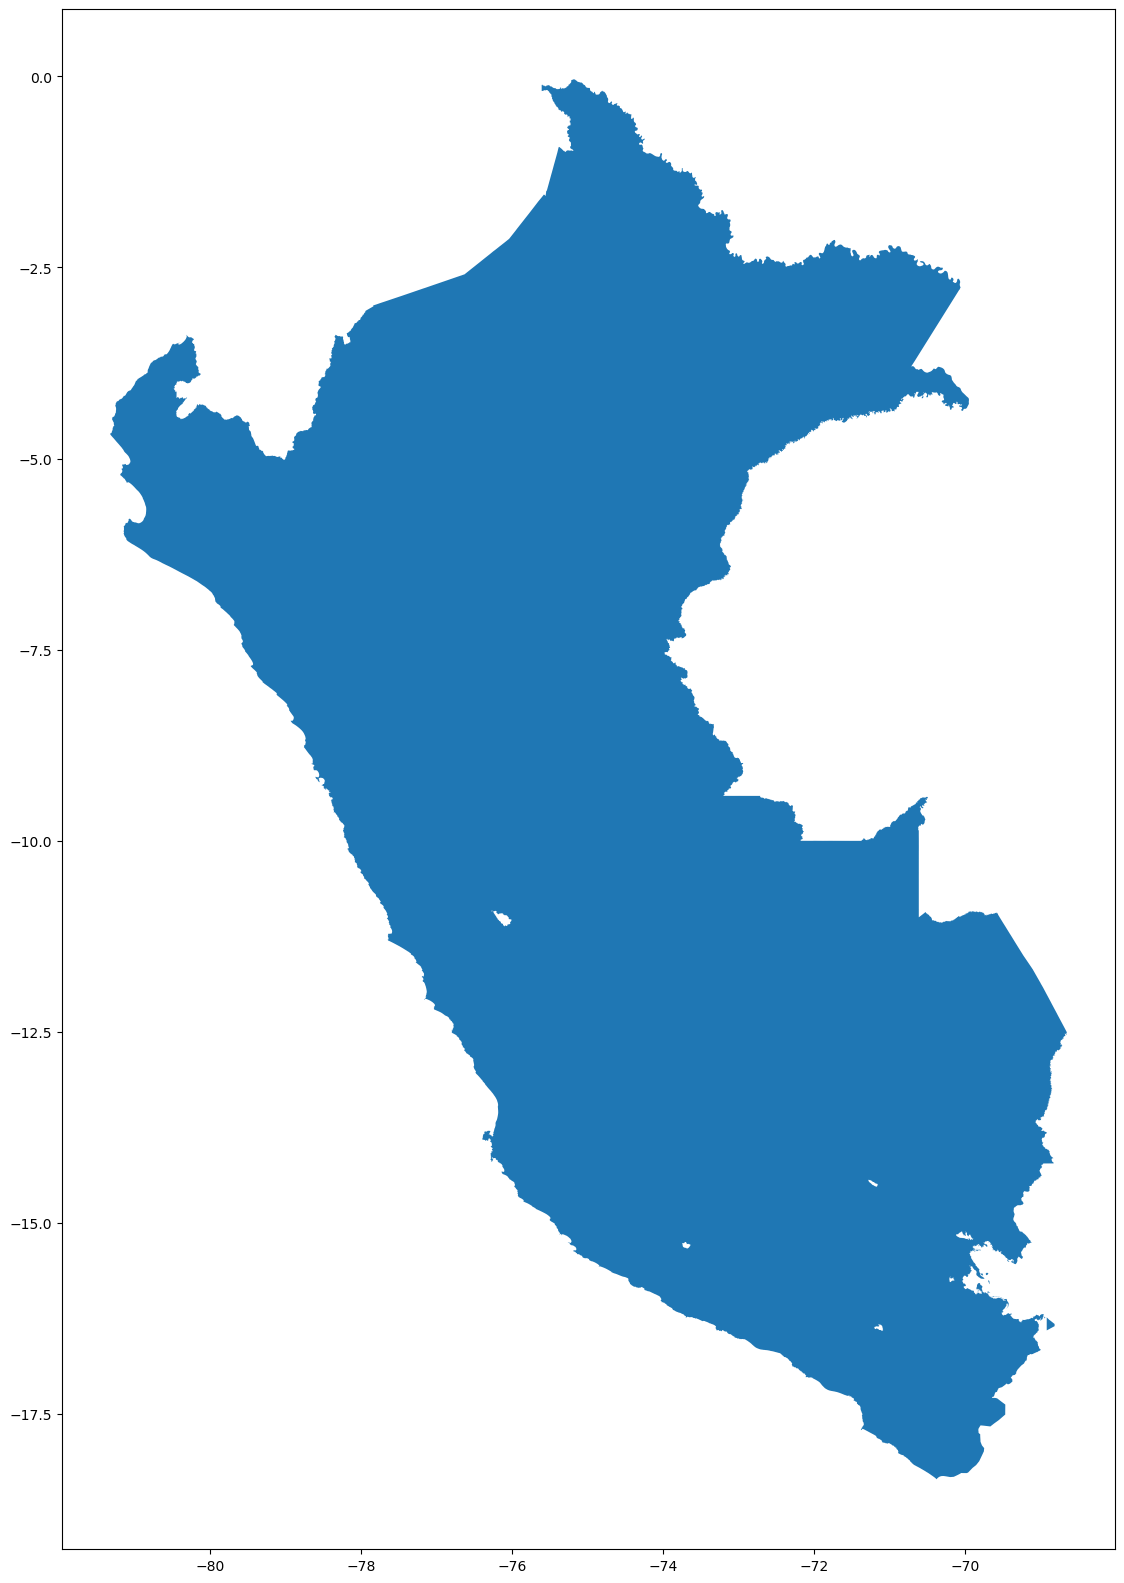

In [26]:
fig, ax = plt.subplots(figsize=(20, 20))
ctr_shp.plot( ax = ax )

Generating grids

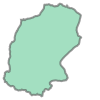

In [27]:
# Import a Shapefile
dist_shp = gpd.read_file(r'../_data/shape_file/DISTRITOS.shp')
dist_shp["geometry"][0]

In [28]:
# Keep only smp geometry
smp_geo = dist_shp.query( "`PROVINCIA` == 'LIMA' & `DISTRITO` == 'SAN MARTIN DE PORRES'").geometry

In [29]:
# Generating grids
xmin, ymin, xmax, ymax= smp_geo.total_bounds

In [30]:
smp_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
import shapely.geometry


In [52]:
# how many cells across and down
n_cells = 80
cell_size = (xmax-xmin)/n_cells
# projection of the grid
crs = 4326

# create the cells in a loop
grid_cells = []
for x0 in np.arange(xmin, xmax+cell_size, cell_size ):
    for y0 in np.arange(ymin, ymax+cell_size, cell_size):
        # bounds
        x1 = x0-cell_size
        y1 = y0+cell_size
        grid_cells.append( shapely.geometry.box(x0, y0, x1, y1)  )
cell = gpd.GeoDataFrame(grid_cells, columns=['geometry'], 
                                 crs=crs)

In [53]:
import matplotlib.pyplot as plt

<Axes: >

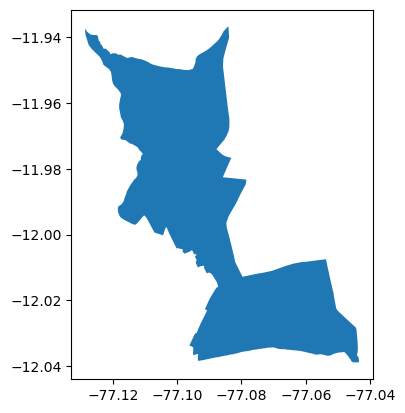

In [54]:
smp_geo.plot()

In [55]:
ax = smp_geo.plot(markersize=.1, figsize=(12, 8), )
plt.autoscale(False)
cell.plot( ax = ax , facecolor="none", edgecolor='grey')
ax.axis("off")


(-77.13292090574994,
 -77.03921094324998,
 -12.043987454999982,
 -11.931614754999881)

### Get Information from Raster

In [46]:

from rasterstats import zonal_stats
import geopandas as gpd

# Load your vector data
dpt_shp = gpd.read_file( r'../_data/INEI_LIMITE_DEPARTAMENTAL/INEI_LIMITE_DEPARTAMENTAL.shp' )

# Specify your raster file
raster_path = '../_data/VIIRS_NTL_Peru_YearlyComposite_2021.tif'  # Change this to your raster file path

# Calculate zonal statistics
stats = zonal_stats(dpt_shp, raster_path, stats=["count", "min", "mean", "max", "sum"])

# The 'stats' variable is a list of dictionaries with the statistics for each feature in the vector file
# For example, to print the statistics for the first feature:
print(stats[0])


{'min': 0.0, 'max': 20.207500457763672, 'mean': 0.009677408154734994, 'count': 39676, 'sum': 383.9608459472656}


In [51]:
stats_gdf = pd.DataFrame(stats)
df1 = pd.concat([dpt_shp, stats_gdf], axis = 1)